In [142]:
import numpy as np
from scipy.integrate import odeint
import qutip as qt
import matplotlib.pyplot as plt

In [123]:
ħ = 1.054e-34
δ = -10e6
ω0 = 2*np.pi*384.23e12
c = 3e8
k = (δ+ω0)/c
x = np.linspace(-0.1,0.1,101)
v = np.linspace(-20,20,101)
I = 30e-3
Ω = ((1.731e-29)*np.sqrt(2*377*I)/ħ)
δm = δ-k*v
δp = δ+k*v
Γ = 2*np.pi*6e6

In [592]:
ħ = 2
k = 0.5
v = np.linspace(-20,20,101)
Ω = np.pi
δ = -1
δm = δ-k*v
δp = δ+k*v
Γ = 2

In [593]:
g = qt.basis(2,0)
e = qt.basis(2,1)
σ = g*e.dag()
L = Γ*qt.lindblad_dissipator(σ)

In [614]:
def F(v):
    Hm = (ħ*Ω/2)*(σ+σ.dag())-ħ*(δ-k*v)*e*e.dag()
    Hp = (ħ*Ω/2)*(σ+σ.dag())-ħ*(δ+k*v)*e*e.dag()
    ρm = qt.steadystate((1/ħ)*Hm, [L])
    ρp = qt.steadystate((1/ħ)*Hp, [L])
    p = 0.785398163397449j*ħ*(σ-σ.dag())
    Fm = (1j/ħ)*qt.commutator(Hm, p)
    Fp = (1j/ħ)*qt.commutator(Hp, p)
    return (ρm*Fm).tr()-(ρp*Fp).tr()

In [615]:
Fn = []
for vi in v:
    Fn.append(F(vi))

In [616]:
Fa = (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*δm**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*δp**2/Γ**2))

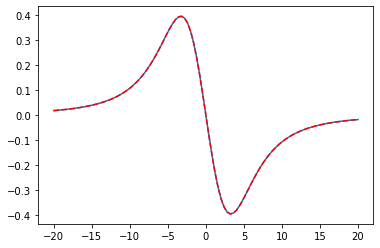

In [617]:
plt.plot(v,Fn)
plt.plot(v,Fa, 'r--')
plt.show()

In [493]:
def f(y, t):
    return (y[1], F(y[1]))
t = np.linspace(0, 100, 1000)
ys = odeint(f, [-2,5], t)
x = ys[:,0]
p = ys[:,1]

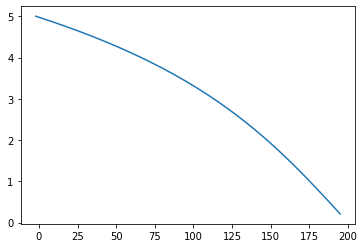

In [9]:
plt.plot(x,p)

In [10]:
def Fa(v):
    return (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*(δ-k*v)**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*(δ+k*v)**2/Γ**2))

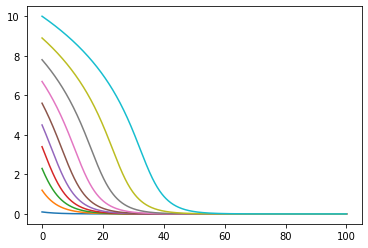

In [11]:
def f(y, t):
    return (y[1], Fa(y[1]))
for p0 in np.linspace(0.1,10,10):
    ys = odeint(f, [-2,p0], t)
    plt.plot(t,ys[:,1])
#x = ys[:,0]
#p = ys[:,1]

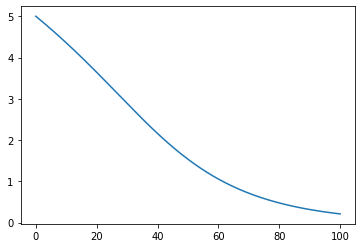

In [12]:
plt.plot(t,p)

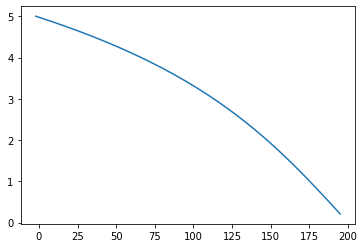

In [13]:
plt.plot(x,p)

**Ahora con la forma no tan genérica del operador de fuerza**

In [169]:
ħ = 20
k = 0.5
v = np.linspace(-20,20,101)
Ω = np.pi
δ = -1
δm = δ-k*v
δp = δ+k*v
Γ = 2

In [170]:
def Ωrabi(x):
    return Ω*np.exp(1j*k*x)

In [171]:
def F(x,v):
    Ham = -ħ*(δ-k*v)*e*e.dag()
    Hap = -ħ*(δ+k*v)*e*e.dag()
    Hintm = (ħ/2)*(np.conj(Ωrabi(x))*σ+Ωrabi(x)*σ.dag())
    Hintp = (ħ/2)*(np.conj(Ωrabi(-x))*σ+Ωrabi(-x)*σ.dag())
    Hm = Ham+Hintm
    Hp = Hap+Hintp
    ρm = qt.steadystate((1/ħ)*Hm, [L])
    ρp = qt.steadystate((1/ħ)*Hp, [L])
    dΩm = lambda t: (Ωrabi(t+0.001)-Ωrabi(t))/0.001
    dΩp = lambda t: (Ωrabi(-t-0.001)-Ωrabi(-t))/0.001
    dHintm = (ħ/2)*(np.conj(dΩm(x))*σ+dΩm(x)*σ.dag())
    dHintp = (ħ/2)*(np.conj(dΩp(x))*σ+dΩp(x)*σ.dag())
    Fm = -(ρm*dHintm).tr()
    Fp = -(ρp*dHintp).tr()
    return Fm+Fp

In [115]:
Fn1 = []
for vi in v:
    Fn1.append(F(0,vi))

In [172]:
Fn2 = []
for vi in v:
    Fn2.append(F(0,vi))

In [116]:
Fa1 = (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*δm**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*δp**2/Γ**2))

In [173]:
Fa2 = (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*δm**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*δp**2/Γ**2))

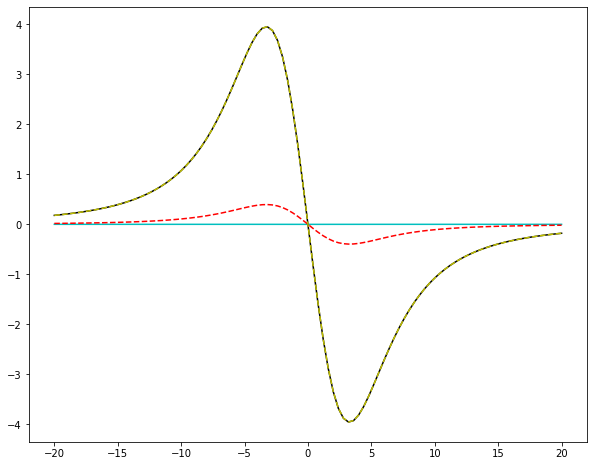

In [174]:
plt.figure(figsize=(10,8))
plt.plot(v,Fn1, 'c')
plt.plot(v,Fa1, 'r--')
plt.plot(v,Fn2, 'k')
plt.plot(v,Fa2, 'y--')
plt.show()